In [29]:
import torch
import torchvision
from itertools import islice
import matplotlib.pyplot as plt

In [5]:
torch.__version__

'1.0.1.post2'

In [6]:
discriminator = torch.load('discriminator.pt', map_location='cpu')


In [7]:
discriminator(torch.zeros(64,64,3))

tensor([15.4640], grad_fn=<ViewBackward>)

In [8]:
img_transforms = torchvision.transforms.Compose([
            #transforms.Resize(constants.INPUT_SIZE),
            #transforms.CenterCrop(constants.INPUT_SIZE),
            torchvision.transforms.ToTensor(),
            #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

In [9]:
img_dataset = torchvision.datasets.ImageFolder('./img_root', transform=img_transforms)

In [10]:
img_dataset

Dataset ImageFolder
    Number of datapoints: 7436
    Root Location: ./img_root
    Transforms (if any): Compose(
                             ToTensor()
                         )
    Target Transforms (if any): None

In [11]:
imgloader = torch.utils.data.DataLoader(img_dataset, batch_size=1)

In [12]:
zero_count = 0
one_count = 1
for x,y in imgloader:
    if y == 0: zero_count += 1
    elif y == 1: one_count += 1

In [13]:
zero_count, one_count
#CelebA, WGAN

(800, 6637)

In [17]:
#celeba_scores = []
#wgan_scores = []

for i, (x, y) in enumerate(imgloader):
    if i == 3000: break
    score = discriminator(x)
    if y == 0: 
        celeba_scores.append(score)
    elif y == 1: 
        wgan_scores.append(score)

In [18]:
len(wgan_scores)

2200

In [19]:
len(celeba_scores)

800

In [25]:
with open('celeba_scores.txt', 'w') as f:
    for x in celeba_scores:
        f.write(str(float(x))+'\n')

In [26]:
with open('wgan_scores.txt', 'w') as f:
    for x in wgan_scores:
        f.write(str(float(x))+'\n')

In [31]:
celeba_scalars = [float(x) for x in celeba_scores]
wgan_scalars = [float(x) for x in wgan_scores]

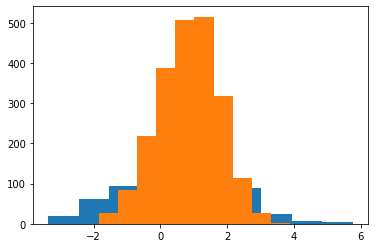

In [33]:
plt.hist(celeba_scalars)
plt.hist(wgan_scalars)
plt.show()

In [ ]:
)